In [0]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os

***Week1-4***

In [3]:

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
os.chdir("/content/drive/My Drive")

In [0]:
transaction_train = pd.read_csv('train_transaction.csv')
identity_train = pd.read_csv('train_identity.csv')

***A) Data preprocessing***

Let's join transaction_train and identity_train.

In [0]:
dataset = transaction_train.join(identity_train.set_index('TransactionID'), on= 'TransactionID')  

In [46]:
dataset.shape, transaction_train.shape, identity_train.shape

((590540, 434), (590540, 394), (144233, 41))

We take a look on the head

In [47]:
dataset.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


 We don't know what each column describes exactly. After looking on kaggle website discussion, we found the following information.

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)

TransactionAMT : That is transaction amount in USD

ProductCD: Product code for each transaction

card1 - card6: Information about payment card 

addr: Address for purchaser and recipient

addr1 as billing region

addr2 as billing country

dist: distance
"distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.


P_ and (R_) emaildomain: Purchaser and recipient email domain 

C1-C14: Counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

D1-D15: Timedelta, such as days between previous transaction, etc.

M1-M9: Match, such as names on card and address, etc.

Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

id01-id11 : Numerical features for identity

IsFraud =1 means fradulent transaction, otherwise nofradulent transaction. 


Let us discover the number of column and row

In [17]:
print("The shape of data :",dataset.shape)

The shape of data : (590540, 434)


We have 434 features with 590540 rows.
What are columns names?

Let's check missing value.

In [18]:
dataset.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

We decide to remove features with 75% of NaN in their observations.

In [0]:
for i in dataset.columns:
  percent = dataset[i].isnull().sum()/dataset.shape[0]
  
  if percent >= 0.75 :
    dataset = dataset.drop([i], axis = 1)

Let's extract the target variable (IsFraud).

In [0]:
y = dataset.isFraud 

In [50]:
y.value_counts(normalize= True)

0    0.96501
1    0.03499
Name: isFraud, dtype: float64

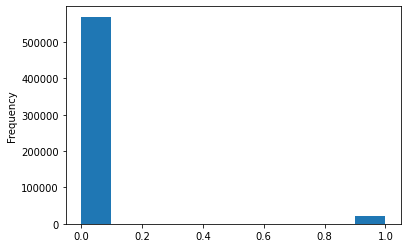

In [51]:
y.plot.hist()

We have 96% of non fradulent transaction and 4% of non fradulent transaction.

Now, we drop isFraud and TransactionID in the dataset.

In [0]:
dataset = dataset.drop(['isFraud','TransactionID'], axis = 1 )

In [53]:
print("The shape of trainig data after dropping features:", dataset.shape)

The shape of trainig data after dropping features: (590540, 224)


 Data cleaning

Let's replace missing values. We will use datacleaner library for dealing with numerical features. The function autoclean from datacleaner library replaces Nan of continuous features by its median.

Its documentation can be find there 
https://github.com/rhiever/datacleaner

In [23]:
pip install datacleaner

In [0]:
from datacleaner import autoclean

We create a mask for categorical features

In [55]:
mask1 =dataset.dtypes==object
categoricalColumns = dataset.columns[mask1]
categoricalFeatures = dataset[categoricalColumns]
categoricalFeatures.head()

,ProductCD,card4,card6,P_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We create a mask for numerical features

In [56]:
mask2 =dataset.dtypes!=object
numericalColumns = dataset.columns[mask2]
numericalFeatures = dataset[numericalColumns]
numericalFeatures.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,13.0,13.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,315.0,315.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,84.0,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
numericalFeatures = autoclean(numericalFeatures)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [58]:
numericalFeatures.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,86400,68.5,13926,361.0,150.0,142.0,315.0,87.0,19.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,97.0,13.0,26.0,10.0,13.0,13.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,8.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,0.0,10.0,0.0,43.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,0.0,10.0,0.0,315.0,315.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,8.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,84.0,43.0,111.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,8.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,26.0,10.0,15.0,43.0,52.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
cardColumns = ['card1', 'card2', 'card3', 'card5']
cardFeatures= numericalFeatures[cardColumns]

Corelation between card features.

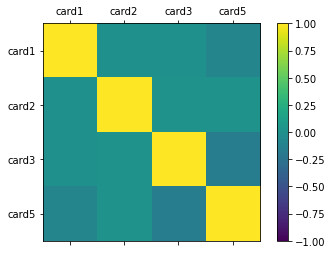

,card1,card2,card3,card5
card1,1.000000,0.004960,0.002966,-0.093550
card2,0.004960,1.000000,0.023816,0.030507
card3,0.002966,0.023816,1.000000,-0.159321
card5,-0.093550,0.030507,-0.159321,1.000000


In [65]:
correlations = cardFeatures.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names = ['']+list(cardFeatures)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
correlations

Corelation between adresse1, adresse2 and distance.

In [0]:
adresseColumns = ['addr1', 'addr2', 'dist1']
adresseFeatures= numericalFeatures[adresseColumns]

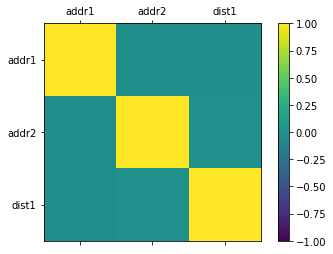

,addr1,addr2,dist1
addr1,1.000000,-0.002094,-0.005339
addr2,-0.002094,1.000000,0.011924
dist1,-0.005339,0.011924,1.000000


In [70]:
correlations = adresseFeatures.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names = ['']+list(adresseFeatures)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
correlations

Corelation between adresse and card

In [0]:
cardAddresseColumns = ['card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1']
cardAddresseFeatures= numericalFeatures[cardAddresseColumns]

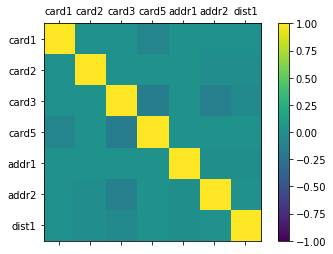

,card1,card2,card3,card5,addr1,addr2,dist1
card1,1.000000,0.004960,0.002966,-0.093550,0.019194,0.000015,0.002860
card2,0.004960,1.000000,0.023816,0.030507,0.029819,-0.019599,-0.018163
card3,0.002966,0.023816,1.000000,-0.159321,0.020647,-0.131724,-0.052435
card5,-0.093550,0.030507,-0.159321,1.000000,0.027334,0.028312,0.020849
addr1,0.019194,0.029819,0.020647,0.027334,1.000000,-0.002094,-0.005339
addr2,0.000015,-0.019599,-0.131724,0.028312,-0.002094,1.000000,0.011924
dist1,0.002860,-0.018163,-0.052435,0.020849,-0.005339,0.011924,1.000000


In [72]:
correlations = cardAddresseFeatures.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names = ['']+list(cardAddresseFeatures)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
correlations

Conclusion: We can not deduce a high correlation between theses features.

Standardization of numerical features.

In [0]:
numericalFeatures=(numericalFeatures-numericalFeatures.mean())/numericalFeatures.std()

In [143]:
numericalFeatures.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,-1.577985,-0.278167,0.821695,-0.009783,-0.281424,-1.396379,0.243321,0.069833,-0.138579,-0.098020,-0.092260,-0.037493,-0.059438,-0.21606,-0.112869,-0.046146,-0.053938,-0.208711,-0.054826,-0.087363,-0.047034,-0.243806,-0.147246,-0.508743,-0.285238,-0.132212,-0.480224,-0.242242,-0.556176,-0.585028,-0.768856,0.005365,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,...,0.198101,0.005694,-0.26163,-0.355724,-0.164931,-0.332323,-0.427193,-0.393307,-0.133971,-0.040597,-0.063552,-0.045782,-0.033239,-0.055210,-0.100639,-0.141693,-0.094117,-0.099554,-0.156979,-0.163187,-0.522440,-0.454029,-0.500162,-0.002603,-0.059496,-0.066411,-0.076246,-0.094585,-0.334844,-0.041046,-0.227583,-0.222385,-0.249222,-0.229148,-0.048377,-0.032814,-0.058049,-0.055287,-0.088855,-0.074142
1,-1.577985,-0.443327,-1.457557,0.264810,-0.281424,-2.368252,0.347542,0.069833,-0.183967,-0.098020,-0.092260,-0.037493,-0.059438,-0.21606,-0.112869,-0.046146,-0.053938,-0.268682,-0.054826,-0.097964,-0.047034,-0.243806,-0.147246,-0.597605,-0.285238,-0.237350,-0.633627,-0.242242,-0.630751,-0.377609,-0.768856,0.005365,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,...,0.198101,0.005694,-0.26163,-0.355724,-0.164931,-0.332323,-0.427193,-0.393307,-0.133971,-0.040597,-0.063552,-0.045782,-0.058539,-0.055210,-0.100639,-0.141693,-0.094117,-0.099554,-0.156979,-0.163187,-0.522440,-0.454029,-0.500162,-0.002603,-0.059496,-0.093051,-0.076246,-0.094585,-0.334844,-0.041046,-0.227583,-0.222385,-0.249222,-0.229148,-0.048377,-0.062211,-0.058049,-0.055287,-0.088855,-0.074142
2,-1.577970,-0.317889,-1.068262,0.813996,-0.281424,-0.813254,0.399653,0.069833,0.967245,-0.098020,-0.092260,-0.037493,-0.059438,-0.21606,-0.112869,-0.046146,-0.053938,-0.208711,-0.054826,-0.097964,-0.047034,-0.243806,-0.147246,-0.597605,-0.285238,-0.237350,-0.633627,-0.242242,-0.630751,1.502993,0.880013,0.005365,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,...,0.198101,0.005694,-0.26163,-0.355724,-0.164931,-0.332323,-0.427193,-0.393307,-0.133971,-0.040597,-0.063552,-0.045782,-0.058539,-0.055210,-0.100639,-0.141693,-0.094117,-0.099554,-0.156979,-0.163187,-0.522440,-0.454029,-0.500162,-0.002603,-0.059496,-0.093051,-0.076246,-0.094585,-0.334844,-0.041046,-0.227583,-0.222385,-0.249222,-0.229148,-0.048377,-0.062211,-0.058049,-0.055287,-0.088855,-0.074142
3,-1.577964,-0.355520,1.679857,1.305709,-0.281424,-2.003800,1.921290,0.069833,-0.183967,-0.090533,-0.066398,-0.037493,-0.059438,-0.21606,-0.070916,-0.046146,-0.053938,-0.208711,-0.054826,-0.097964,-0.047034,-0.058284,-0.147246,0.113291,-0.172822,-0.405571,-0.079017,-0.399848,-0.148879,-0.377609,-0.187826,0.005365,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,...,-0.887761,-0.636544,-0.26163,2.690805,-0.164931,3.374863,-0.427193,-0.393307,-0.133971,-0.040597,-0.063552,0.002789,0.902852,0.869194,-0.100639,-0.141693,-0.094117,-0.099554,-0.156979,-0.163187,-0.522440,-0.454029,-0.500162,-0.002603,-0.038209,0.307227,0.229853,-0.094585,0.668046,-0.041046,0.556723,-0.222385,-0.249222,-0.229148,-0.026351,0.290552,0.224769,-0.055287,-0.088855,-0.074142
4,-1.577962,-0.355520,-1.102132,0.967258,-0.281424,-2.368252,1.337648,0.069833,-0.183967,-0.098020,-0.092260,-0.037493,-0.059438,-0.21606,-0.112869,-0.046146,-0.043454,-0.268682,-0.044364,-0.097964,-0.047034,-0.243806,-0.147246,-0.597605,-0.285238,-0.237350,-0.480224,-0.242242,-0.544703,-0.377609,-0.496662,0.005365,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,...,0.198101,0.005694,-0.26163,-0.355724,-0.164931,-0.3323

We use get_dummies method to encode categorical features.

In [0]:
def encoding():
  x = pd.get_dummies(data=categoricalFeatures, columns= categoricalFeatures.columns)
  encoded = numericalFeatures.join(x)
  return encoded
  

In [0]:
datasetEncoded = encoding()

In [77]:
datasetEncoded.shape

(590540, 302)

In [78]:
datasetEncoded.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,P_emaildomain_protonmail.com,P_emaildomain_ptd.net,P_emaildomain_q.com,P_emaildomain_roadrunner.com,P_emaildomain_rocketmail.com,P_emaildomain_sbcglobal.net,P_emaildomain_sc.rr.com,P_emaildomain_servicios-ta.com,P_emaildomain_suddenlink.net,P_emaildomain_twc.com,P_emaildomain_verizon.net,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com,M1_F,M1_T,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,-1.577985,-0.278167,0.821695,-0.009783,-0.281424,-1.396379,0.243321,0.069833,-0.138579,-0.098020,-0.092260,-0.037493,-0.059438,-0.21606,-0.112869,-0.046146,-0.053938,-0.208711,-0.054826,-0.087363,-0.047034,-0.243806,-0.147246,-0.508743,-0.285238,-0.132212,-0.480224,-0.242242,-0.556176,-0.585028,-0.768856,0.005365,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0
1,-1.577985,-0.443327,-1.457557,0.264810,-0.281424,-2.368252,0.347542,0.069833,-0.183967,-0.098020,-0.092260,-0.037493,-0.059438,-0.21606,-0.112869,-0.046146,-0.053938,-0.268682,-0.054826,-0.097964,-0.047034,-0.243806,-0.147246,-0.597605,-0.285238,-0.237350,-0.633627,-0.242242,-0.630751,-0.377609,-0.768856,0.005365,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,-1.577970,-0.317889,-1.068262,0.813996,-0.281424,-0.813254,0.399653,0.069833,0.967245,-0.098020,-0.092260,-0.037493,-0.059438,-0.21606,-0.112869,-0.046146,-0.053938,-0.208711,-0.054826,-0.097964,-0.047034,-0.243806,-0.147246,-0.597605,-0.285238,-0.237350,-0.633627,-0.242242,-0.630751,1.502993,0.880013,0.005365,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0
3,-1.577964,-0.355520,1.679857,1.305709,-0.281424,-2.003800,1.921290,0.069833,-0.183967,-0.090533,-0.066398,-0.037493,-0.059438,-0.21606,-0.070916,-0.046146,-0.053938,-0.208711,-0.054826,-0.097964,-0.047034,-0.058284,-0.147246,0.113291,-0.172822,-0.405571,-0.079017,-0.399848,-0.148879,-0.377609,-0.187826,0.005365,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
4,-1.577962,-0.355520,-1.102132,0.967258,-0.281424,-2.368252,1.337648,0.069833,-0.183967,-0.098020,-0.092260,-0.037493,-0.059438,-0.21606,-0.112869,-0.046146,-0.043454,-0.268682,-0.044364,-0.097964,-0.047034,-0.243806,-0.147246,-0.597605,-0.285238,-0.237350,-0.480224,-0.242242,-0.544703,-0.377609,-0.496662,0.005365,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


***Week5-Today***

***B) Training and prediction***

Let's define auc function which return auc_score.

In [0]:
from sklearn.metrics import roc_auc_score
def auc(y_true, y_pred):
    """
        return the AUC
        ex : auc(y_true, y_prediction)
    """
    return roc_auc_score(y_true, y_pred)

***Gradient boosting classifier***

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [0]:
p = 0.3
X_train, X_test, y_train, y_test = train_test_split( datasetEncoded, y, shuffle = True, test_size = p, random_state = 42)

In [129]:
baseline =GradientBoostingClassifier(learning_rate= 0.1, max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)



GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)

In [131]:
feat_imp

C1                               0.090456
C14                              0.063113
V45                              0.054060
V86                              0.048453
C11                              0.038561
                                   ...   
P_emaildomain_centurylink.net    0.000000
P_emaildomain_cableone.net       0.000000
P_emaildomain_bellsouth.net      0.000000
P_emaildomain_att.net            0.000000
V120                             0.000000
Length: 302, dtype: float64

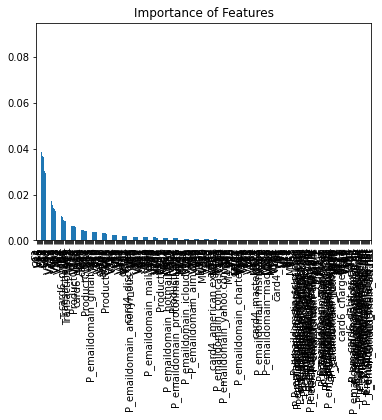

In [132]:
feat_imp.plot(kind='bar', title='Importance of Features')

In [133]:
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))

Accuracy of the GBM on test set: 0.973


In [134]:
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    170821
           1       0.88      0.29      0.43      6341

    accuracy                           0.97    177162
   macro avg       0.93      0.64      0.71    177162
weighted avg       0.97      0.97      0.97    177162



In [135]:
print("auc score is",auc(y_test, pred))

auc score is 0.6431583515358315


***Hyperparamaters tunning for GradientBoostingClassifier***

***a) Optimization of learning rate***

In [0]:
parameters = {'learning_rate':[0.1,0.05,0.01,0.001]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameters, scoring='roc_auc',n_jobs=4, cv=3)

In [122]:
tuning.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=4,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
       

In [128]:
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1}, 0.8807924288230137)

***b) optimization of n_estimators***

In [0]:
parameters = {'n_estimators':[100,75,50, 125]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate= 0.1,max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameters, scoring='roc_auc',n_jobs=4, cv=3)

In [149]:
tuning.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=4,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
       

In [150]:
tuning.best_params_, tuning.best_score_

({'n_estimators': 125}, 0.8844381566231744)

***c) optimization of max_depth***

In [0]:
parameters = {'max_depth':[4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameters, scoring='roc_auc',n_jobs=4,iid=False, cv=3)

In [152]:
tuning.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
       

In [153]:
tuning.best_params_, tuning.best_score_

({'max_depth': 7}, 0.9051113462915211)

***Gradient boosting model with best hyperparameters(Best model)***


In [154]:
baseline =GradientBoostingClassifier(learning_rate= 0.1, max_depth=7, n_estimators=125,min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)

In [156]:
feat_imp

C1                           0.080595
C14                          0.050597
V45                          0.035586
C4                           0.031979
C13                          0.024969
                               ...   
P_emaildomain_hotmail.de     0.000000
P_emaildomain_hotmail.fr     0.000000
V28                          0.000000
P_emaildomain_netzero.com    0.000000
P_emaildomain_live.fr        0.000000
Length: 302, dtype: float64

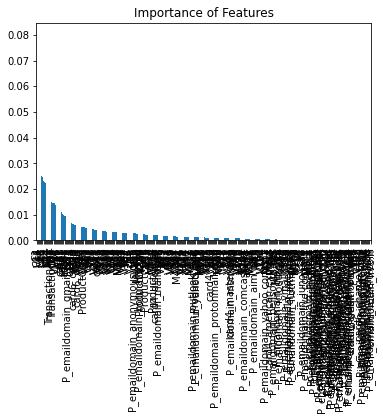

In [157]:
feat_imp.plot(kind='bar', title='Importance of Features')

In [158]:
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))

Accuracy of the GBM on test set: 0.977


In [160]:
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170821
           1       0.90      0.41      0.57      6341

    accuracy                           0.98    177162
   macro avg       0.94      0.71      0.78    177162
weighted avg       0.98      0.98      0.97    177162



In [161]:
print("auc score is",auc(y_test, pred))

auc score is 0.7062951418287615


Partial conclusion: With gradient bosting algorithm, we got an auc_score which equals to 0.70 (and an 0.97 of accuracy).

*** Ada Boost***

We will use important features.

In [0]:
nonImportantFeatures = []
for i in X_train.columns:
  if feat_imp[i] == 0:
    nonImportantFeatures.append(i)

In [189]:
len(nonImportantFeatures)

34

In [0]:
ImportantFeaturesTrain = X_train.drop(nonImportantFeatures, axis= 1)

In [193]:
ImportantFeaturesTrain.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,P_emaildomain_gmail.com,P_emaildomain_hotmail.com,P_emaildomain_hotmail.es,P_emaildomain_icloud.com,P_emaildomain_juno.com,P_emaildomain_live.com,P_emaildomain_live.com.mx,P_emaildomain_mac.com,P_emaildomain_mail.com,P_emaildomain_me.com,P_emaildomain_msn.com,P_emaildomain_netzero.net,P_emaildomain_optonline.net,P_emaildomain_outlook.com,P_emaildomain_outlook.es,P_emaildomain_protonmail.com,P_emaildomain_roadrunner.com,P_emaildomain_sbcglobal.net,P_emaildomain_verizon.net,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_ymail.com,M1_T,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
366215,0.371175,-0.359702,1.487250,-0.265218,-0.281424,0.644556,0.191210,0.069833,-0.183967,-0.090533,-0.092260,-0.037493,-0.059438,-0.216060,-0.112869,-0.046146,-0.053938,-0.208711,-0.054826,-0.087363,-0.047034,-0.243806,-0.147246,-0.597605,-0.285238,-0.237350,-0.633627,-0.399848,-0.630751,-0.674909,-0.768856,-0.135535,-0.174217,0.246322,0.184755,5.567716,4.288268,7.256718,5.905649,-0.550895,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1
437716,0.799446,-0.478725,1.478885,-0.571741,2.809737,-0.060052,0.076566,0.069833,-0.183967,-0.090533,-0.072864,-0.037493,-0.015864,-0.216060,-0.084900,0.002455,-0.022485,-0.268682,-0.012977,-0.066162,-0.000880,-0.228346,-0.147246,0.398919,0.164428,2.054663,0.286790,2.058803,-0.630751,-0.377609,-0.768856,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,-0.550895,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
578692,1.741456,-0.472596,1.308925,0.239267,-0.281424,0.595962,-1.757735,0.069833,-0.183967,-0.098020,-0.092260,-0.037493,-0.044913,-0.216060,-0.126853,-0.046146,-0.043454,-0.268682,-0.044364,-0.097964,-0.047034,-0.243806,-0.147246,-0.597605,-0.285238,-0.237350,-0.480224,-0.242242,-0.544703,-0.377609,-0.496662,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,-0.550895,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
364816,0.365485,-0.204995,0.550739,-1.606254,-0.281424,-0.813254,2.108889,0.069833,-0.200472,-0.098020,-0.092260,-0.037493,-0.059438,-0.216060,-0.070916,-0.046146,-0.053938,0.031170,-0.054826,-0.087363,-0.047034,-0.181965,-0.147246,-0.254852,-0.644971,-0.258378,-0.551025,-0.289524,-0.315240,-0.578114,-0.695573,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,-0.550895,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1
223792,-0.455054,0.422068,-0.493093,0.813996,-0.281424,0.644556,0.347542,0.069833,-0.183967,0.725524,0.554283,-0.037493,-0.059438,4.437452,0.796114,-0.046146,-0.053938,3.809305,-0.054826,0.665263,-0.047034,3.180617,1.770231,2.728372,2.914886,0.183203,2.458030,0.041448,2.375216,-0.377609,1.974025,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,-0.550895,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
  X_testNew=  X_test.drop(nonImportantFeatures, axis=1)

In [195]:
X_testNew.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,P_emaildomain_gmail.com,P_emaildomain_hotmail.com,P_emaildomain_hotmail.es,P_emaildomain_icloud.com,P_emaildomain_juno.com,P_emaildomain_live.com,P_emaildomain_live.com.mx,P_emaildomain_mac.com,P_emaildomain_mail.com,P_emaildomain_me.com,P_emaildomain_msn.com,P_emaildomain_netzero.net,P_emaildomain_optonline.net,P_emaildomain_outlook.com,P_emaildomain_outlook.es,P_emaildomain_protonmail.com,P_emaildomain_roadrunner.com,P_emaildomain_sbcglobal.net,P_emaildomain_verizon.net,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_ymail.com,M1_T,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
470624,1.035529,2.462647,-0.422906,0.756523,-0.281424,0.595962,0.993717,0.069833,-0.183967,-0.083047,-0.092260,-0.037493,-0.059438,-0.216060,-0.112869,-0.046146,-0.053938,-0.148741,-0.054826,-0.097964,-0.047034,-0.236076,-0.127062,-0.597605,-0.285238,-0.237350,0.221889,-0.399848,0.201053,-0.674909,-0.009853,-0.135535,-0.174217,0.246322,0.184755,5.567716,4.288268,-0.107532,-0.132158,-0.550895,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1
565820,1.653282,-0.110917,0.539721,-0.265218,-0.281424,0.644556,1.921290,0.069833,-0.216977,-0.090533,-0.092260,-0.037493,-0.059438,-0.216060,-0.112869,-0.046146,-0.053938,-0.208711,-0.054826,-0.097964,-0.035495,-0.197425,-0.127062,0.176764,-0.097877,-0.300433,1.413711,-0.321045,1.359842,0.168596,1.047518,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,-0.550895,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1
284083,-0.087094,-0.364092,-0.101758,-1.606254,-0.281424,0.595962,0.243321,0.069833,-0.192220,-0.098020,-0.092260,-0.037493,-0.059438,-0.138501,-0.112869,-0.046146,-0.053938,-0.208711,-0.054826,-0.097964,-0.047034,-0.228346,-0.147246,-0.394492,-0.772377,0.057037,-0.503825,-0.053115,-0.441444,-0.446748,-0.596117,-0.135535,-0.174217,-2.797412,-2.664919,-0.137377,-0.171279,-0.107532,-0.132158,1.702131,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
239689,-0.367895,-0.143953,1.221395,1.165220,2.809737,-1.493566,0.076566,0.069833,-0.183967,-0.090533,-0.079329,-0.037493,-0.044913,-0.216060,-0.112869,-0.029946,-0.053938,-0.268682,-0.054826,-0.097964,-0.035495,-0.251536,-0.167430,-0.597605,-0.285238,-0.405571,-0.633627,-0.399848,-0.630751,-0.377609,-0.768856,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,-0.550895,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
281855,-0.105157,-0.113217,1.142230,0.813996,-0.281424,0.644556,0.076566,0.069833,-0.183967,-0.030639,-0.008209,-0.037493,-0.059438,0.210512,-0.014978,-0.046146,-0.053938,0.091141,-0.054826,-0.002560,-0.047034,0.080857,0.014225,2.887054,3.102247,-0.069129,2.605532,-0.147679,1.927763,-0.377609,2.104888,-0.135535,-0.174217,0.246322,0.184755,-0.137377,-0.171279,-0.107532,-0.132158,-0.550895,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
 ada_boost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4), n_estimators= 50, learning_rate=0.5, random_state=42)

voting = VotingClassifier(
    estimators=[('log', LogisticRegression(max_iter=5000)), ('gb', ada_boost)],
    voting='soft')

In [204]:
voting.fit(ImportantFeaturesTrain, y_train)

VotingClassifier(estimators=[('log',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=5000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('gb',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=DecisionTreeClas...
                                                                                       criterion='

In [206]:
print('Accuracy of the GBM on test set: {:.3f}'.format(voting.score(X_testNew, y_test)))

Accuracy of the GBM on test set: 0.969


In [208]:
pred=voting.predict(X_testNew)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    170821
           1       0.84      0.17      0.28      6341

    accuracy                           0.97    177162
   macro avg       0.90      0.59      0.63    177162
weighted avg       0.97      0.97      0.96    177162



In [210]:
print("auc score is",auc(y_test, pred))

auc score is 0.5851791332359526


***Optimization of hyperparameters***

In [0]:
ada_boost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4),n_estimators = 100, random_state=42)
parameters = {'learning_rate': [0.1,0.05, 0.5,0.1]}
grid_object = GridSearchCV(estimator = ada_boost, param_grid = parameters, scoring = 'roc_auc', cv = 3, n_jobs = -1)

In [0]:
grid_object.bestparams ...

Now, we will use features important features only with gradient bosting and ada bosting.